In [1]:
import os
import re
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import spacy
from spellchecker import SpellChecker
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def create_df_spellchecking(res_dir, lang='de'):
    spell = SpellChecker(language=lang)  
    
    epochs = []
    temps = []
    gen_texts = []
    correct_percents = []
    for root, dirnames, filenames in os.walk(source):
        for filename in filenames:
            if filename.endswith(('.txt')):
                txt_file = os.path.join(root, filename)

                with open(txt_file, 'r') as f:
                    gen_text = f.readlines()
                    gen_text_str = " ".join(gen_text)
                    gen_text_words = gen_text_str.split(' ')

                    temp = float(re.findall('temp\d.\d', txt_file)[0].replace('temp', ''))
                    epoch = int(re.findall('E\d+', txt_file)[0].replace('E', ''))
                    missspelled = spell.unknown(gen_text_words)

                    epochs.append(epoch)
                    temps.append(temp)
                    correct_percents.append(len(missspelled)/len(gen_text_words))
                    gen_texts.append(gen_text_str)
    df = pd.DataFrame({'epochs': epochs, 'temps': temps, 'correct_percents': correct_percents, 'gen_texts': gen_texts})
    
    return df


def plot_spelling_epochs_spellingCorrectness(df):
    temps = np.sort(df.temps.unique())
    for temp in temps:
        print('Correctness (0-1) for temp {}'.format(temp))
        sorted_df = df[df.temps == temp].sort_values(["epochs", "temps"])
        plt.plot(sorted_df.epochs, sorted_df.correct_percents)
        plt.show()
        

def create_df_docsim(res_dir, lyrics, lang='de_core_news_sm'):
    nlp = spacy.load('de_core_news_sm')
    doc = nlp(lyrics)
    
    epochs = []
    temps = []
    gen_texts = []
    doc_sims = []
    for root, dirnames, filenames in os.walk(source):
        for filename in filenames:
            if filename.endswith(('.txt')):
                txt_file = os.path.join(root, filename)

                with open(txt_file, 'r') as f:
                    gen_text = f.readlines()
                    gen_text_str = " ".join(gen_text)
                    doc_gen = nlp(gen_text_str)     
                    
                    temp = float(re.findall('temp\d.\d', txt_file)[0].replace('temp', ''))
                    epoch = int(re.findall('E\d+', txt_file)[0].replace('E', ''))

                    epochs.append(epoch)
                    temps.append(temp)
                    gen_texts.append(gen_text_str)
                    doc_sims.append(doc.similarity(doc_gen))
                    
    df = pd.DataFrame({'epochs': epochs, 'temps': temps, 'doc_sims': doc_sims, 'gen_texts': gen_texts})
    
    return df


def plot_docsims_epochs(df):
    temps = np.sort(df.temps.unique())
    for temp in temps:
        print('Similarity (0-1) to Lyrics Corpus for generated lyrics with temp {}'.format(temp))
        sorted_df = df[df.temps == temp].sort_values(["epochs", "doc_sims"])
        plt.plot(sorted_df.epochs, sorted_df.doc_sims)
        plt.show()
        
        
# util methods
def load_json(json_path, artists=[]):
    if (os.path.isfile(json_path)):
        print("json")
        with open(json_path) as f:
            song_data = json.load(f)
            return song_data['songs']
        
    elif (os.path.isdir(json_path)):
        data = []
        json_files = []
        if (len(artists) > 0):
            for artist in artists:
                json_files = json_files + [json_file for json_file in os.listdir(json_path) if ((json_file.endswith('.json')) & (artist in json_file))]
        else:
            json_files = [json_file for json_file in os.listdir(json_path) if json_file.endswith('.json')]

        for json_file in json_files:
            path_to_json = os.path.join(json_path, json_file)
            with open(path_to_json) as f:
                song_data = json.load(f)
                data = data + song_data['songs']
        
        return data
    
    
def normalize_lyric(text, lower=True):
    if lower:
        text = text.lower()
    text = re.sub('\[.+\](\\n)|\[.+\](\(.*\))', '', text)
    return text 


## Character Based

Charbased Simple LSTM:
Correctness (0-1) for temp 0.2


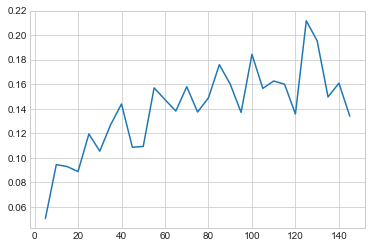

Correctness (0-1) for temp 0.4


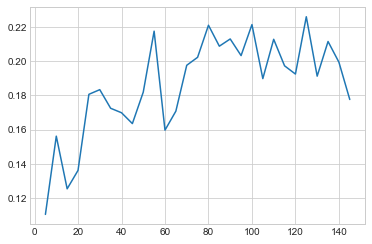

Correctness (0-1) for temp 0.5


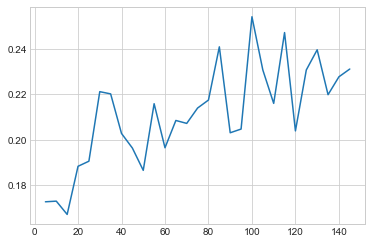

Correctness (0-1) for temp 0.6


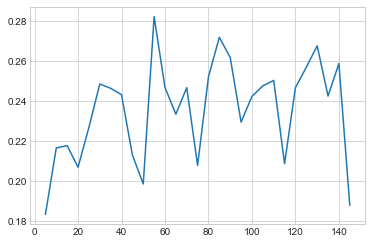

Correctness (0-1) for temp 0.8


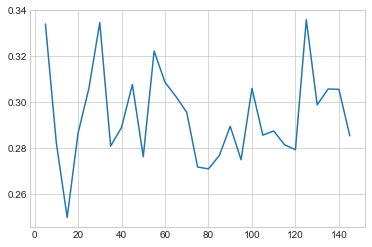

Correctness (0-1) for temp 1.0


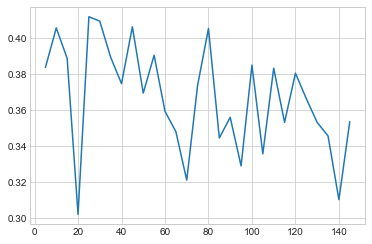

In [3]:
source = '../outputs/charbased/LSTM/'
df = create_df_spellchecking(source)
print('Charbased Simple LSTM:')
plot_spelling_epochs_spellingCorrectness(df)

Charbased 2layer LSTM:
Correctness (0-1) for temp 0.2


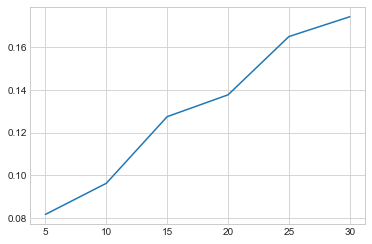

Correctness (0-1) for temp 0.4


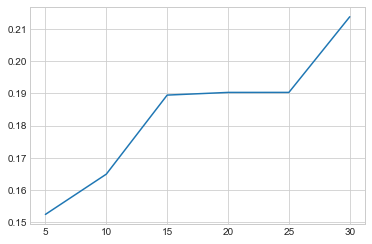

Correctness (0-1) for temp 0.5


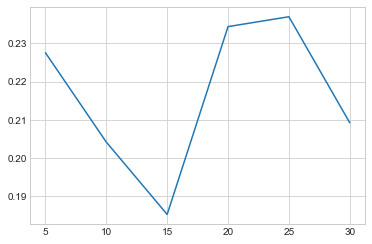

Correctness (0-1) for temp 0.6


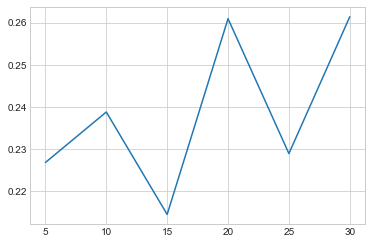

Correctness (0-1) for temp 0.8


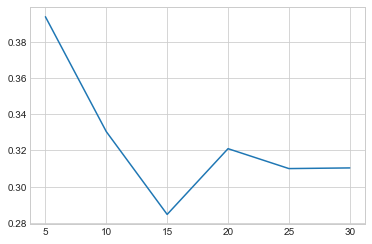

Correctness (0-1) for temp 1.0


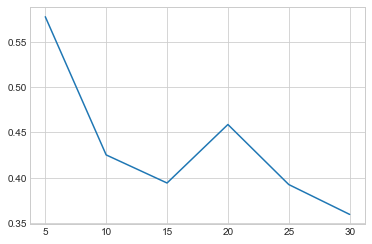

In [4]:
source = '../outputs/charbased/2layer_dropout_lr0.001/'
df = create_df_spellchecking(source)
print('Charbased 2layer LSTM:')
plot_spelling_epochs_spellingCorrectness(df)

Charbased Simple CNN:
Correctness (0-1) for temp 0.2


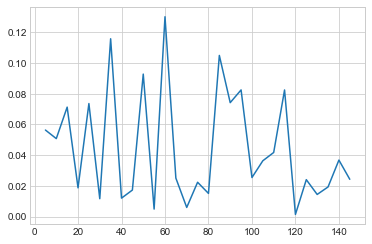

Correctness (0-1) for temp 0.4


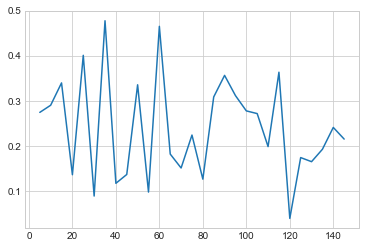

Correctness (0-1) for temp 0.5


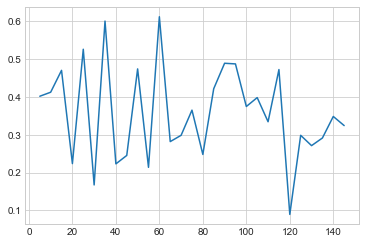

Correctness (0-1) for temp 0.6


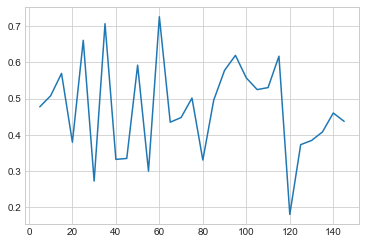

Correctness (0-1) for temp 0.8


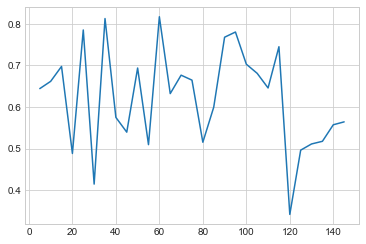

Correctness (0-1) for temp 1.0


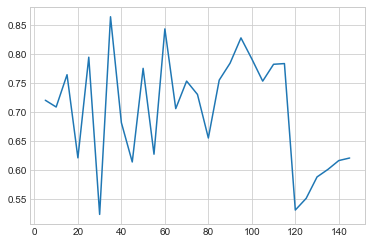

In [5]:
source = '../outputs/charbased/CNN/'
df = create_df_spellchecking(source)
print('Charbased Simple CNN:')
plot_spelling_epochs_spellingCorrectness(df)

Wordbased Simple LSTM:
Correctness (0-1) for temp 0.2


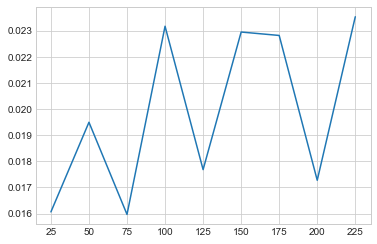

Correctness (0-1) for temp 0.4


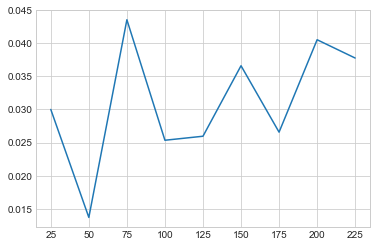

Correctness (0-1) for temp 0.5


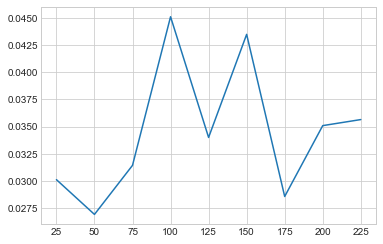

Correctness (0-1) for temp 0.6


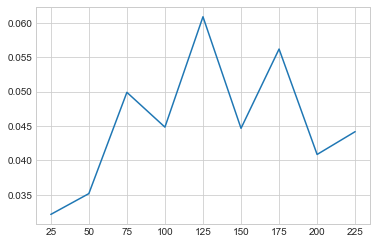

Correctness (0-1) for temp 0.8


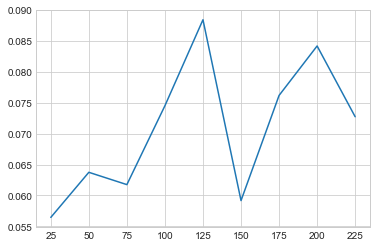

Correctness (0-1) for temp 1.0


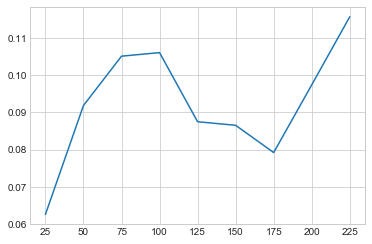

In [6]:
source = '../outputs/wordbased/LSTM/'
df = create_df_spellchecking(source)
print('Wordbased Simple LSTM:')
plot_spelling_epochs_spellingCorrectness(df)

## Word Based

In [7]:
json_path = '../data/deutsch'
artists = ['Bushido']

data = load_json(json_path, artists)
df = json_normalize(data)

lyrics = normalize_lyric(''.join(df.lyrics.values))

Similarity (0-1) to Lyrics Corpus for generated lyrics with temp 0.2


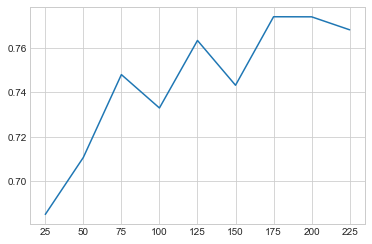

Similarity (0-1) to Lyrics Corpus for generated lyrics with temp 0.4


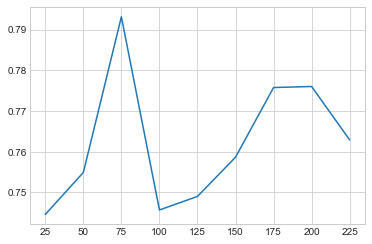

Similarity (0-1) to Lyrics Corpus for generated lyrics with temp 0.5


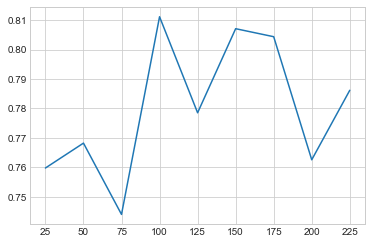

Similarity (0-1) to Lyrics Corpus for generated lyrics with temp 0.6


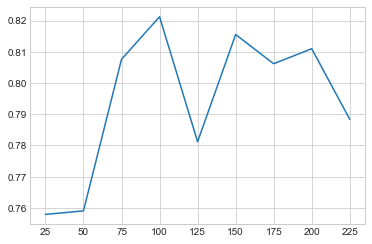

Similarity (0-1) to Lyrics Corpus for generated lyrics with temp 0.8


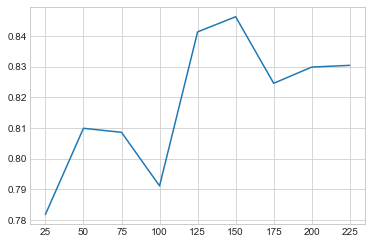

Similarity (0-1) to Lyrics Corpus for generated lyrics with temp 1.0


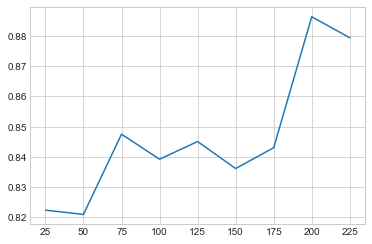

In [8]:
source = '../outputs/wordbased/LSTM/'
df = create_df_docsim(source, lyrics)
plot_docsims_epochs(df)